In [1]:
import numpy as np
import pandas as pd
from vtk import *
from vtk.util.numpy_support import vtk_to_numpy
import matplotlib.pyplot as plt

### Memory quad: 184 MB, lin: 132 MB
### Runtime quad: 24.9 s, lin: 8.4 s

In [2]:
plt.rcParams['legend.fontsize']=12
plt.rcParams['font.size'] = 14
#plt.rcParams['lines.linewidth']= 2.0
plt.rcParams['legend.frameon']=True
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['legend.fontsize']=14
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams['font.size'] = 14
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.axisbelow'] = True

In [3]:
refpoint = (0.0,0.0,0.0)

In [9]:
file = {'lin': "square_1e0_lin_pcs_0_ts_10_t_50000.000000.vtu", 'quad': "square_1e0_pcs_0_ts_10_t_50000.000000.vtu"}

In [10]:
ls

expected_square_1e0_lin_pcs_0_ts_10_t_50000.000000.vtu
expected_square_1e0_pcs_0_ts_10_t_1000.000000.vtu
expected_square_1e0_pcs_0_ts_10_t_50000.000000.vtu
lin_vs_quad.ipynb
nummodel_square.prj
quarter_002_2nd.vtu
quarter_002.vtu
square_1e0_lin_pcs_0.pvd
square_1e0_lin_pcs_0_ts_0_t_0.000000.vtu
square_1e0_lin_pcs_0_ts_10_t_50000.000000.vtu
square_1e0_pcs_0.pvd
square_1e0_pcs_0_ts_0_t_0.000000.vtu
square_1e0_pcs_0_ts_10_t_50000.000000.vtu
square_1e2_lin.prj
square_1e2.prj
square_1x1.gml
square_geom.gml
square_mesh_ascii.vtu
square_mesh_Q_ascii.vtu
square_mesh_Q.vtu
square_mesh.vtu
square_rect_1e0_pcs_0.pvd
square_rect_1e0_pcs_0_ts_0_t_0.000000.vtu
square_rect_1e0_pcs_0_ts_10_t_50000.000000.vtu
square_rect_1e2.prj
square_rect_linear_1e0_pcs_0.pvd
square_rect_linear_1e0_pcs_0_ts_0_t_0.000000.vtu
square_rect_linear_1e0_pcs_0_ts_10_t_50000.000000.vtu
square_rect_linear_1e2.prj
untitled.txt
verification_lin_quad.py


In [11]:
var = ['pts','x', 'temp', 'displ_x', 'press','sigma_xx','sigma_yy']

In [12]:
array = {}
for order in file:
    array[order] = {}
    for v in var:
        array[order][v] = []

In [13]:
for order in file:
    reader = vtkXMLUnstructuredGridReader()
    reader.SetFileName(file[order])
    reader.Update()
    output = reader.GetOutput()
    points=vtk_to_numpy(output.GetPoints().GetData())
    temp = vtk_to_numpy(output.GetPointData().GetArray(8))
    press = vtk_to_numpy(output.GetPointData().GetArray(5))
    displ = vtk_to_numpy(output.GetPointData().GetArray(2))
    sigma = vtk_to_numpy(output.GetPointData().GetArray(6))
    for j in np.arange(0,len(points)):
        d = np.abs((points[j,1]-refpoint[1]))
        if d< 1.e-4:
            array[order]['pts'].append(j)
            array[order]['x'].append(points[j,0])
            array[order]['temp'].append(temp[j])
            array[order]['displ_x'].append(displ[j,0])
            array[order]['press'].append(press[j])
            array[order]['sigma_xx'].append(sigma[j,0])
            array[order]['sigma_yy'].append(sigma[j,1])

In [14]:
print(len(array['lin']['x']))
print(len(array['quad']['x']))

65
129


In [15]:
df_lin = pd.DataFrame(array['lin'], index=array['lin']['x'])
df_quad = pd.DataFrame(array['quad'], index=array['quad']['x'])

In [16]:
limits = {'x': {'temp': (0.0001,1.0), 'press': (0.0001,1.0), 'displ_x': (0.0001,10.0),  'sigma_xx': (0.0001,1.0), 'sigma_yy': (0.0001,1.0) },
         'y': {'temp': (0.0, 700.0), 'press': (0.001,3.6e7), 'displ_x': (0.00,0.00035),  'sigma_xx': (-4e7,6.e6), 'sigma_yy': (-2e7,1.5e7)}
         }


## responsfct

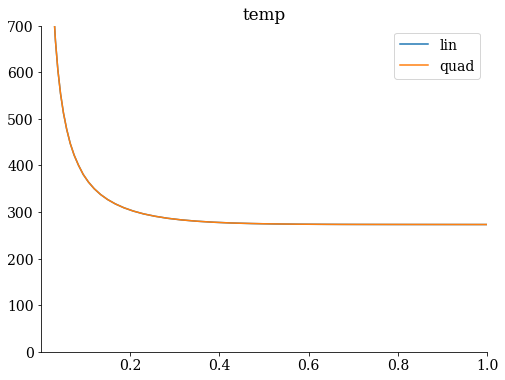

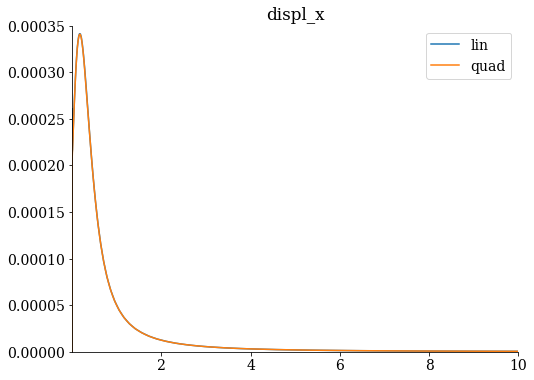

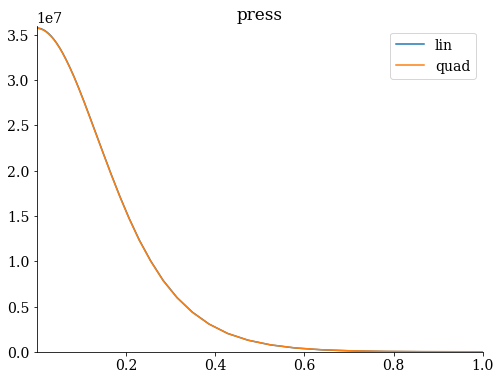

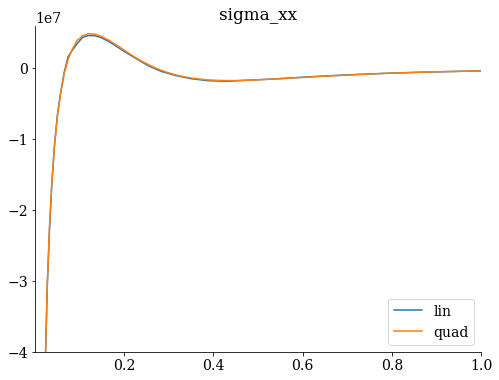

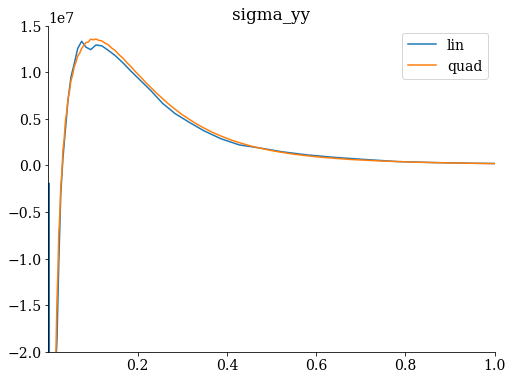

In [17]:
for v in var:
    if not (v == 'pts' or v == 'x'):
        plt.plot(df_lin.sort_values(['x'], ascending=False)[v], label='lin')
        plt.plot(df_quad.sort_values(['x'], ascending=False)[v], label='quad')
        plt.legend()
        plt.xlim(limits['x'][v])
        plt.ylim(limits['y'][v])
        plt.title(v)
        plt.show()

## Error:

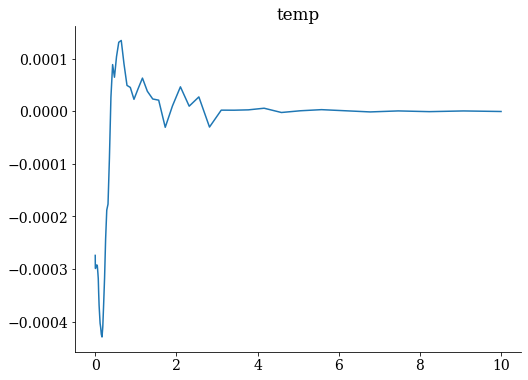

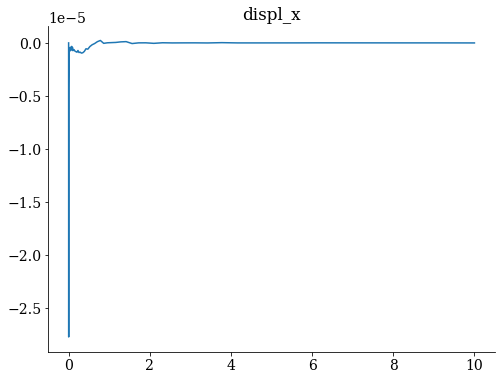

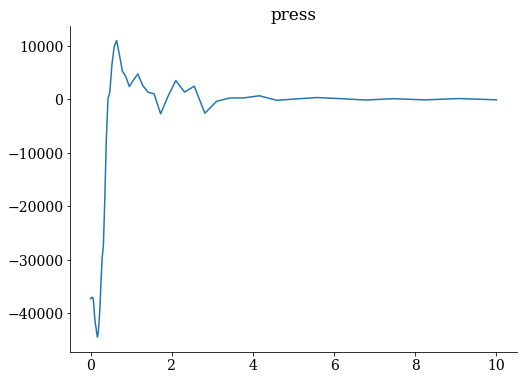

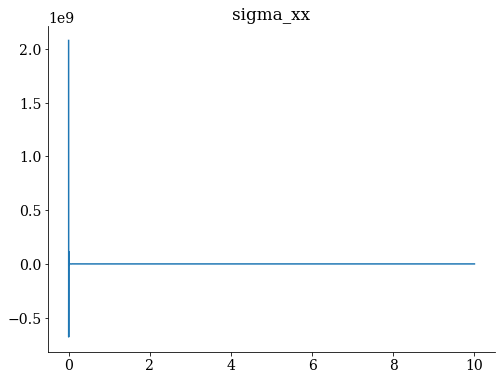

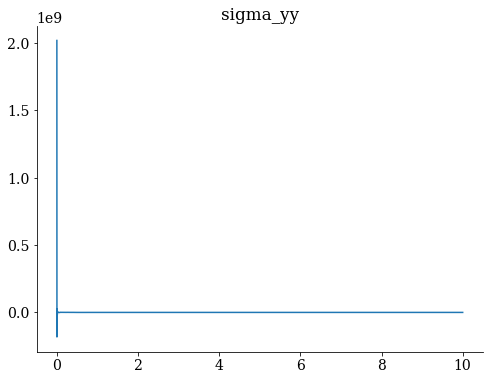

In [18]:
for v in var:
    if not (v == 'pts' or v == 'x'):
        plt.plot((df_quad.sort_values(['x'],ascending=False)-df_lin.sort_values(['x'],ascending=False)).dropna()[v])
        plt.title(v)
        plt.show()
